# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [1]:
# ファイルをダウンロードする
!wget https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!wget https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!wget https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

--2024-12-06 12:00:12--  https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 158711 (155K) [application/zip]
`794_ruby_4237.zip.1' に保存中

794_ruby_4237.zip.1 100%[===================>] 154.99K  --.-KB/s 時間 0.1s       

2024-12-06 12:00:12 (1.17 MB/s) - `794_ruby_4237.zip.1' へ保存完了 [158711/158711]

--2024-12-06 12:00:12--  https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
www.aozora.gr.jp (www.aozora.gr.jp) をDNSに問いあわせています... 59.106.13.115
www.aozora.gr.jp (www.aozora.gr.jp)|59.106.13.115|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 202267 (198K) [application/zip]
`1746_ruby_18324.zip' に保存中

1746_ruby_18324.zip 100%[===================>] 197.53K  1.19MB/s 時間 0.2s       

2024-12-06 12:00:13 (1.19 MB/s) - `1746_ruby_18324.zip' へ保存完了 [202267/202267]

--2024-12-

In [2]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [3]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [4]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [5]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%
To reinstall 9.5, run:
  brew reinstall coreutils


In [6]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [7]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

To reinstall 9.5, run:
  brew reinstall coreutils


In [8]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

In [10]:
# 形態素解析
import spacy

input_fn = "text/all.corpus.txt"
output_fn = "text/all.wakati.txt"

nlp = spacy.load("ja_ginza")

with open(input_fn, "r") as fin, open(output_fn, "w") as fout:
    for line in fin:
        tokens = [token.text for token in nlp(line.rstrip())]
        fout.write(' '.join(tokens) + "\n")

In [11]:
# ファイルを読み込み、テキストを一行ずつ解析
all_tokens = []
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)

In [26]:
from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("ある", "する", "いる", "なる", "ない", "ゐる", "もの", "さん", "つ", "いう", "あり", "さう", "つう", "事")
#stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出現頻度top 30を出力する
for word, count in counter.most_common(30):
    print(f"{count:>5} {word}")

 1332 代助
 1172 来る
 1126 三四郎
  944 見る
  941 御
  849 云ふ
  845 時
  845 宗助
  782 自分
  779 出る
  680 聞く
  666 云う
  636 行く
  619 言う
  581 中
  572 人
  564 上
  563 所
  535 米
  502 気
  498 方
  472 女
  465 出す
  443 顔
  434 三千代
  432 前
  401 平岡
  399 帰る
  395 思う
  364 こと


In [27]:
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

In [28]:
words

['目',
 'さめる',
 '女',
 'ま',
 '隣',
 'じい',
 '話',
 '始める',
 'じい',
 'たしか',
 '前',
 '前',
 '駅',
 '乗る',
 'いなか者',
 '発車',
 'まぎわ',
 '頓狂',
 '声',
 '出す',
 '駆け込む',
 '来る',
 '肌',
 'ぬぐ',
 '思う',
 '背中',
 'お',
 '灸',
 'あと',
 '三四郎',
 '記憶',
 '残る',
 'じい',
 '汗',
 'ふく',
 '肌',
 '入れる',
 '女',
 '隣',
 '腰',
 'かける',
 '注意',
 '見る',
 '女',
 '京都',
 '相乗り',
 '乗る',
 '時',
 '三四郎',
 '目',
 'つく',
 '第',
 '色',
 '黒い',
 '三四郎',
 '九州',
 '山陽',
 '線',
 '移る',
 '京',
 '大阪',
 '近づく',
 '来る',
 'うち',
 '女',
 '色',
 '次第',
 '白い',
 'ま',
 '故郷',
 '遠のく',
 '哀れ',
 '感ずる',
 '女',
 '車室',
 'はいる',
 '来る',
 '時',
 '異性',
 '味方',
 '得る',
 '心持ち',
 '女',
 '色',
 'じっさい',
 '九州',
 '色',
 '三輪田',
 'お光',
 '同じ',
 '色',
 '国',
 '立つ',
 'まぎわ',
 'お光',
 'うるさい',
 '女',
 'そば',
 '離れる',
 'ありがたい',
 'みる',
 'お光',
 'よう',
 '悪い',
 '顔だち',
 '女',
 'ほう',
 '上等',
 '口',
 '目',
 '額',
 'お光',
 'よう',
 'だだっ広い',
 'いい',
 '心持ち',
 'できあがる',
 '三四郎',
 '分',
 '一度',
 '目',
 '上げる',
 '女',
 '方',
 '見る',
 '時々',
 '女',
 '自分',
 '目',
 'ゆきあたる',
 'こと',
 'じい',
 '女',
 '隣',
 '腰',
 'かける',
 '時',
 '注意',
 '長い',
 'あいだ',
 '女',
 '様子',
 '見る',
 '時女'

In [29]:
# フォントファイルの場所の指定
if sys.platform == "darwin":
    fpath = "/Library/Fonts/Arial Unicode.ttf"
else:
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"

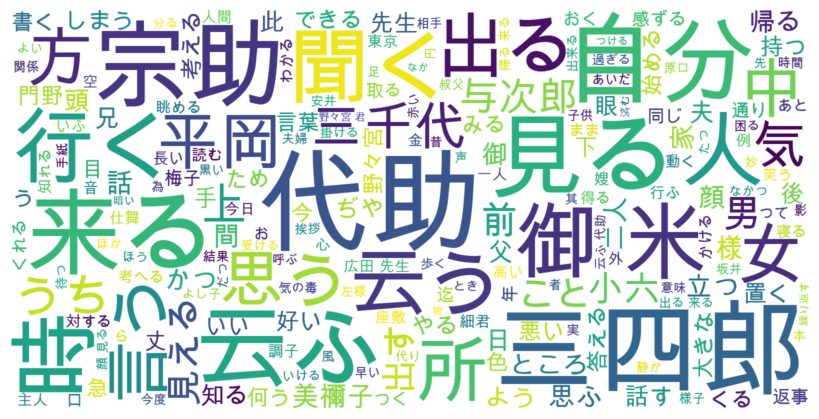

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.all.png", dpi=300)
plt.show()

## 共起ネットワーク

In [31]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words

In [33]:
def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X

In [35]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("ある", "する", "いる", "なる", "ない", "ゐる", "もの", "さん", "つ", "いう", "あり", "さう", "つう", "事")
#stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [36]:
# 共起ランキングを出力する
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

160 (云ふ, 代助)
134 (云う, 宗助)
127 (代助, 見る)
126 (出る, 来る)
120 (先生, 広田)
108 (帰る, 来る)
105 (三千代, 代助)
103 (三四郎, 見る)
 95 (かつ, 代助)
 94 (代助, 平岡)
 89 (代助, 来る)
 89 (来る, 見る)
 85 (云う, 来る)
 83 (代助, 自分)
 82 (三四郎, 言う)
 81 (云ふ, 来る)
 80 (宗助, 見る)
 76 (代助, 思ふ)
 75 (宗助, 来る)
 71 (三四郎, 美禰子)


In [38]:
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

In [39]:
def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

In [40]:
def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

In [41]:
def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

In [42]:
def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [43]:
def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True) 
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G

In [44]:
# ネットワークを作る
G = create_network(words, word_counts, Xc, 0.01)

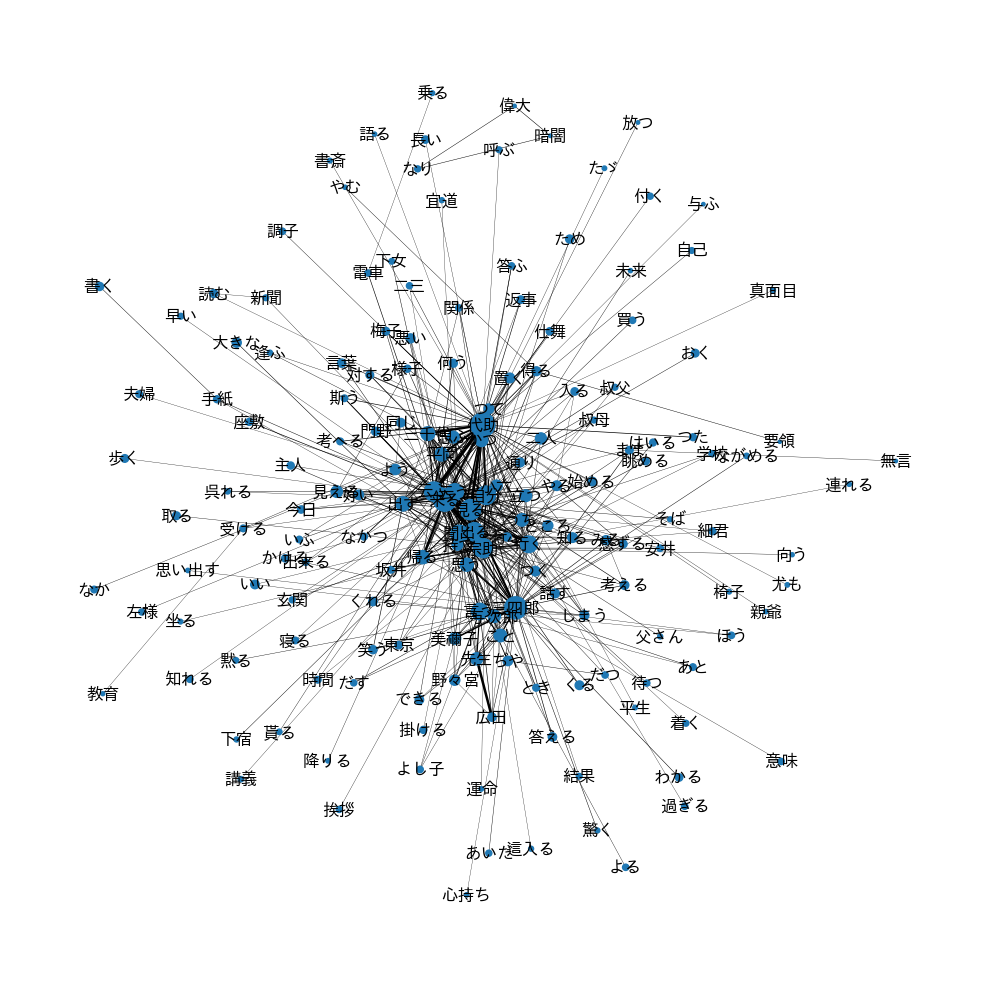

In [45]:
# 静的ビジュアライゼーション
pyplot_network(G)

In [46]:
# インタラクティブなビジュアライゼーション
pyvis_G = nx2pyvis_G(G)
pyvis_G.show_buttons()
pyvis_G.show("network.all.html")

network.all.html


## 共起ヒートマップ

In [47]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "PROPN")
stopwords = ("ある", "する", "いる", "なる", "ない", "ゐる", "もの", "さん", "つ", "いう", "あり", "さう", "つう", "事")
#stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [58]:
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

120 (先生, 広田)
105 (三千代, 代助)
 94 (代助, 平岡)
 81 (代助, 自分)
 71 (三四郎, 美禰子)
 67 (三四郎, 与次郎)
 62 (宗助, 自分)
 55 (こと, 三四郎)
 49 (三千代, 平岡)
 43 (三千代, 自分)
 42 (宗助, 小六)
 40 (代助, 梅子)
 39 (三四郎, 自分)
 38 (代助, 門野)
 35 (平岡, 自分)
 33 (うち, 代助)
 31 (つた, 代助)
 31 (坂井, 宗助)
 28 (つて, 代助)
 28 (代助, 返事)


In [51]:
# 行名を用意する

columns = set(Xc.nonzero()[0])
columns_text = [words[i] for i in columns]

In [52]:
# すべて0のデータフレームを用意する

import pandas as pd

df = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns_text, columns=columns_text)

In [53]:
# データフレームに頻度を入れる

for cord, count in counter.items():
    df.iloc[cord] = count

In [ ]:
# 登場人物名のみを取り出す

characters = ["三四郎", "広田", "野々宮", "佐々木", "与次郎", "美禰子", "先生", "原口", "里見",\
             "三千代", "代助", "平岡", "宗助", "小六", "梅子", "門野", "坂井", "安井", "野々宮"]
df_characters = df[characters].filter(items=characters, axis=0)

In [56]:
import plotly.express as px

fig = px.imshow(df_characters, color_continuous_scale=px.colors.sequential.Oranges,
                title="『三四郎』『それから』『門』の登場人物", width=800, height=800)
fig.update_layout(font=dict(size=16))
fig.show()
fig.write_image("heatmap.all.png", scale=2)